# **Analyzing Flight Price Trends Insights and Visualizations using Pandas, Matplotlib, and Seaborn**



In this project, I will be analyzing a flight price dataset to uncover insights about the factors influencing flight prices and travel times. This dataset, sourced from various airlines, provides a detailed overview of key attributes related to airline operations. The primary field of interest, "Price (in Rupees ₹)," represents the cost of flight tickets. Additionally, the dataset encompasses vital information such as the names of airlines, source and destination cities, the number of stops, departure and arrival times, and the duration of flights. By examining these attributes, we aim to identify patterns and trends that can help understand the dynamics of flight pricing. The dataset is available here: https://www.kaggle.com/datasets/viveksharmar/flight-price-data/data

**Importing our Python Libraries and the CSV Dataset**

In this project, I'll be conducting data analysis and visualization using Python. The key libraries for this project include Pandas for data manipulation and Seaborn for data visualization. I will also use Matplotlib to utilize the plt function for displaying our Seaborn graphs. Numpy is included along with Pandas by default.


In [ ]:
# Installing necessary packages
!pip install pandas --upgrade --quiet
!pip install matplotlib --upgrade --quiet
!pip install seaborn --upgrade --quiet

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")
%matplotlib inline

# **Data Preparation and Cleaning**

The dataset I've chosen is already in CSV format. Now I have read the contents of the csv file into a variable air_df.

In [ ]:
air_df = pd.read_csv('/kaggle/input/flight-price-data/flight_dataset.csv')


Before starting off with our analysis, I would like to view the dataset to understand how the data looks and its columns. To do this, I will print the head and tail of the dataset.

In [ ]:
air_df.head(10)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,2019,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,1,22270,1,3,2019,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,1,8625,27,5,2019,11,25,19,15,7,50


In [ ]:
air_df.tail(10)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
10673,Jet Airways,Delhi,Cochin,2,16704,27,5,2019,13,25,4,25,15,0
10674,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,20,35,21,20,24,45
10675,Air India,Mumbai,Hyderabad,0,3100,9,6,2019,6,20,7,40,1,20
10676,Multiple carriers,Delhi,Cochin,1,9794,1,5,2019,10,20,19,0,8,40
10677,SpiceJet,Banglore,Delhi,0,3257,21,5,2019,5,55,8,35,2,40
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40
10682,Air India,Delhi,Cochin,2,11753,9,5,2019,10,55,19,15,8,20


I also want to see what the shape of the data is so I print the shape of the dataframe. Here is the outcome:

In [ ]:
air_df.shape

(10683, 14)

In [ ]:
print(f'The dataset contains {air_df.shape[0]} rows and {air_df.shape[1]} columns.')

The dataset contains 10683 rows and 14 columns.


This shows is that the dataframe has 10683 rows and 14 columns. Before proceeding with our analysis, it's important to understand the structure and datatypes of our dataset. This helps in identifying any necessary data cleaning or transformation steps. To achieve this, let's inspect the data types of each column using the info() method in our DataFrame.

In [ ]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


To better understand the dataset, here is a table that provides detailed information about each column. This table describes what each column represents and the type of values it contains. Having a clear understanding of the data columns is crucial for effective analysis and visualization.

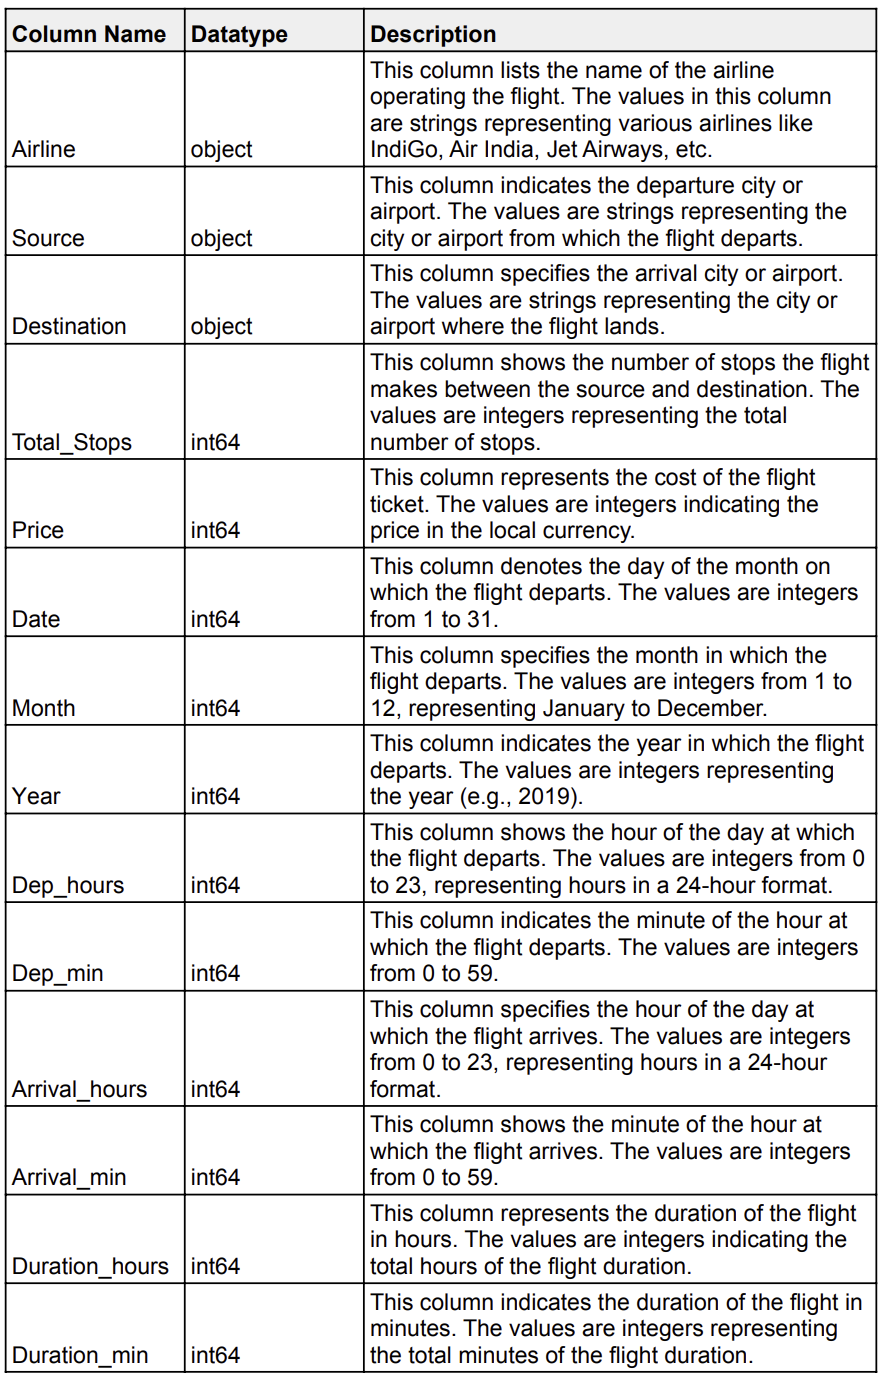

From this dataset, we can identify several important columns that are crucial for our analysis of flight prices and travel times. Each of these columns provides significant insights into different aspects of airline operations. Here's a critical look at some of the key columns:

(a) **Price:** This is the primary response variable in our dataset, representing the cost of flight tickets. Analyzing this column will help us understand the factors influencing flight prices. We'll explore how different attributes like the number of stops, departure and arrival times, and flight duration impact ticket prices.

(b) **Total_Stops:** The number of stops a flight makes between the source and destination can significantly affect the price and duration of the flight. Generally, flights with more stops tend to be cheaper but have longer travel times. We'll examine the relationship between total stops and price to see if this trend holds true in our dataset.

(c) **Airline:** Different airlines have different pricing strategies, which can affect ticket prices. By analyzing the data across various airlines, we can identify patterns and trends in pricing and service quality.

(d) **Source and Destination:** The cities where flights originate and land can also influence prices. For example, flights between major cities might be more expensive due to higher demand, whereas flights to smaller cities might be cheaper. We'll analyze the impact of different routes on ticket prices.

(e) **Departure and Arrival Times:** The time of day a flight departs or arrives can affect its price. Peak hours might see higher prices compared to off-peak hours. We'll explore this relationship to see how time affects flight costs.

(f) **Duration:** The total duration of the flight in hours and minutes can influence the ticket price. Generally, longer flights might be more expensive. We'll analyze how flight duration correlates with price.



Now, we check for any missing values in the dataset.

In [ ]:
# Check for missing values
missing_values = air_df.isnull().sum()
print("Missing values in each column:\n", missing_values, '\n')
print("Any missing value? ", air_df.isnull().values.any())


Missing values in each column:
 Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64 

Any missing value?  False


There seems to be no missing values in any of the columns. So we do not need to account for them.

Next, we'll adjust the column names for date-related data to standardize them and then consolidate these into a single datetime column, which simplifies any subsequent temporal analysis.

I also want a column that contains the overall duration of each flight in hours for analysis. So, let's add a column called Duration_Hours

In [ ]:
# Rename columns to match the required format for pd.to_datetime
air_df.rename(columns={'Date': 'day', 'Month': 'month', 'Year': 'year'}, inplace=True)

# Combine day, month, and year into a single datetime column
air_df['Flight_Date'] = pd.to_datetime(air_df[['year', 'month', 'day']])
air_df.head(10)

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Flight_Date
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,2019-03-24
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,2019-05-01
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,2019-06-09
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,2019-05-12
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,2019-03-01
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,2019,9,0,11,25,2,25,2019-06-24
6,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,18,55,10,25,15,30,2019-03-12
7,Jet Airways,Banglore,New Delhi,1,22270,1,3,2019,8,0,5,5,21,5,2019-03-01
8,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,8,55,10,25,25,30,2019-03-12
9,Multiple carriers,Delhi,Cochin,1,8625,27,5,2019,11,25,19,15,7,50,2019-05-27


In [ ]:
air_df['Duration_Minutes'] = air_df['Duration_hours']*60 + air_df['Duration_min']

air_df['Duration_Minutes'] = air_df['Duration_Minutes'].apply(lambda x: x if x >= 0 else x + 1440)

air_df['Duration_Hours'] = (air_df['Duration_Minutes']/60).round(2)

air_df.drop(columns=['Duration_hours'], inplace=True)
air_df.drop(columns=['Duration_min'], inplace=True)
air_df.drop(columns=['Duration_Minutes'], inplace=True)


air_df.head(10)

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Flight_Date,Duration_Hours
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2019-03-24,2.83
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,2019-05-01,7.42
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,2019-06-09,19.00
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,2019-05-12,5.42
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,2019-03-01,4.75
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,2019,9,0,11,25,2019-06-24,2.42
6,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,18,55,10,25,2019-03-12,15.50
7,Jet Airways,Banglore,New Delhi,1,22270,1,3,2019,8,0,5,5,2019-03-01,21.08
8,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,8,55,10,25,2019-03-12,25.50
9,Multiple carriers,Delhi,Cochin,1,8625,27,5,2019,11,25,19,15,2019-05-27,7.83


Let us save and upload our work to Jovian before continuing.

In [ ]:
!pip install jovian --upgrade -q

import jovian

# Define the project name
project_name = "analyzing-flight-price-trends-insights-and-visualizations-using-pandas-matplotlib-and-seaborn"

# Define the filename of your notebook (replace 'your-notebook-name.ipynb' with your actual notebook filename)
filename = 'your-notebook-name.ipynb'

# Commit to Jovian with the specified filename and project name
jovian.commit(filename=filename, project=project_name)

Let's have a look at some of the basic statistics of our numerical data. his includes metrics like mean, median, standard deviation, minimum and maximum values, and the quartiles. This step helps in identifying any anomalies or outliers that may need to be addressed before further analysis.

In [ ]:
print(air_df.describe())

        Total_Stops         Price           day         month     year  \
count  10683.000000  10683.000000  10683.000000  10683.000000  10683.0   
mean       0.824207   9087.064121     13.508378      4.708602   2019.0   
min        0.000000   1759.000000      1.000000      3.000000   2019.0   
25%        0.000000   5277.000000      6.000000      3.000000   2019.0   
50%        1.000000   8372.000000     12.000000      5.000000   2019.0   
75%        1.000000  12373.000000     21.000000      6.000000   2019.0   
max        4.000000  79512.000000     27.000000      6.000000   2019.0   
std        0.675199   4611.359167      8.479277      1.164357      0.0   

          Dep_hours       Dep_min  Arrival_hours   Arrival_min  \
count  10683.000000  10683.000000   10683.000000  10683.000000   
mean      12.490686     24.411214      13.348778     24.690630   
min        0.000000      0.000000       0.000000      0.000000   
25%        8.000000      5.000000       8.000000     10.000000   
50%

Based on the summary statistics of the dataset, here are some key insights:

1. **Total Stops:**
* The average number of stops is around 0.82, with the majority of flights having 0 or 1 stop.
* The maximum number of stops is 4.

2. **Price:**
* The mean flight price is approximately 9087, with a significant standard deviation of 4611, indicating a wide range of prices.
* The minimum price is 1759, and the maximum is 79512.

3. **Date:**
* The flights are distributed evenly across the dates, with the mean being around the 13th of the month.
* The dataset covers flights between the 1st and 27th of each month.

4. **Month:**
* The dataset spans from March to June 2019, with May and June being the most represented months.

5. **Departure and Arrival Times:**
* Departure hours range from midnight (0) to late evening (23), with an average departure time around 12:30 PM.
* Arrival hours also span the full 24 hours, with an average arrival time around 1:30 PM.

6. **Duration:**
* The flight durations vary widely, with an average of 10 hours and 15 minutes.
* The shortest flight duration is 1 hour, and the longest is 47 hours.

I also want to note down the range of dates between which the data was recorded. Let's find it out as follows:

In [ ]:
air_df["year"].unique()

array([2019])

In [ ]:
air_df["month"].unique()

array([3, 5, 6, 4])

In [ ]:
air_df["day"].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

This shows that the data was recorded on specific dates during the months of March, April, May and June in the year 2019.

Let's also find the list of all sources (starting point) and destination venues.

In [ ]:
air_df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
air_df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

This shows that the flights we are dealing with are all domestic flights. The flights travel between the mega-cities of India.


Let us save and upload our work to Jovian before continuing.

In [ ]:
# Commit to Jovian with the specified filename and project name
jovian.commit(filename=filename, project=project_name)

# Questions about the Data along with Exploratory Analysis & Visualization

**1. Calculate the average flight price**

In [ ]:
avg_price = air_df["Price"].mean()

In [ ]:
print("The average flight price is ₹{:.2f}".format(avg_price))

The average flight price is ₹9087.06


**2. Summarize the total number of flights per airline.**

In [ ]:
flights_per_airline = air_df["Airline"].value_counts().to_frame()

print("The number of flight per airline is: \n\n ")

flights_per_airline


The number of flight per airline is: 

 


,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1752
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


The number of flights is highest for Jet Airways followed by IndiGo, indicating that they are major players in the market. On the lower side of the spectrum, we find airlines such as Trujet, Vistara Premium economy, and Jet Airways Business, which have a significantly lower number of flights. This suggests that these airlines either cater to niche markets or have limited operations compared to the major players.

Text(0.5, 1.0, 'Flights by Airline')

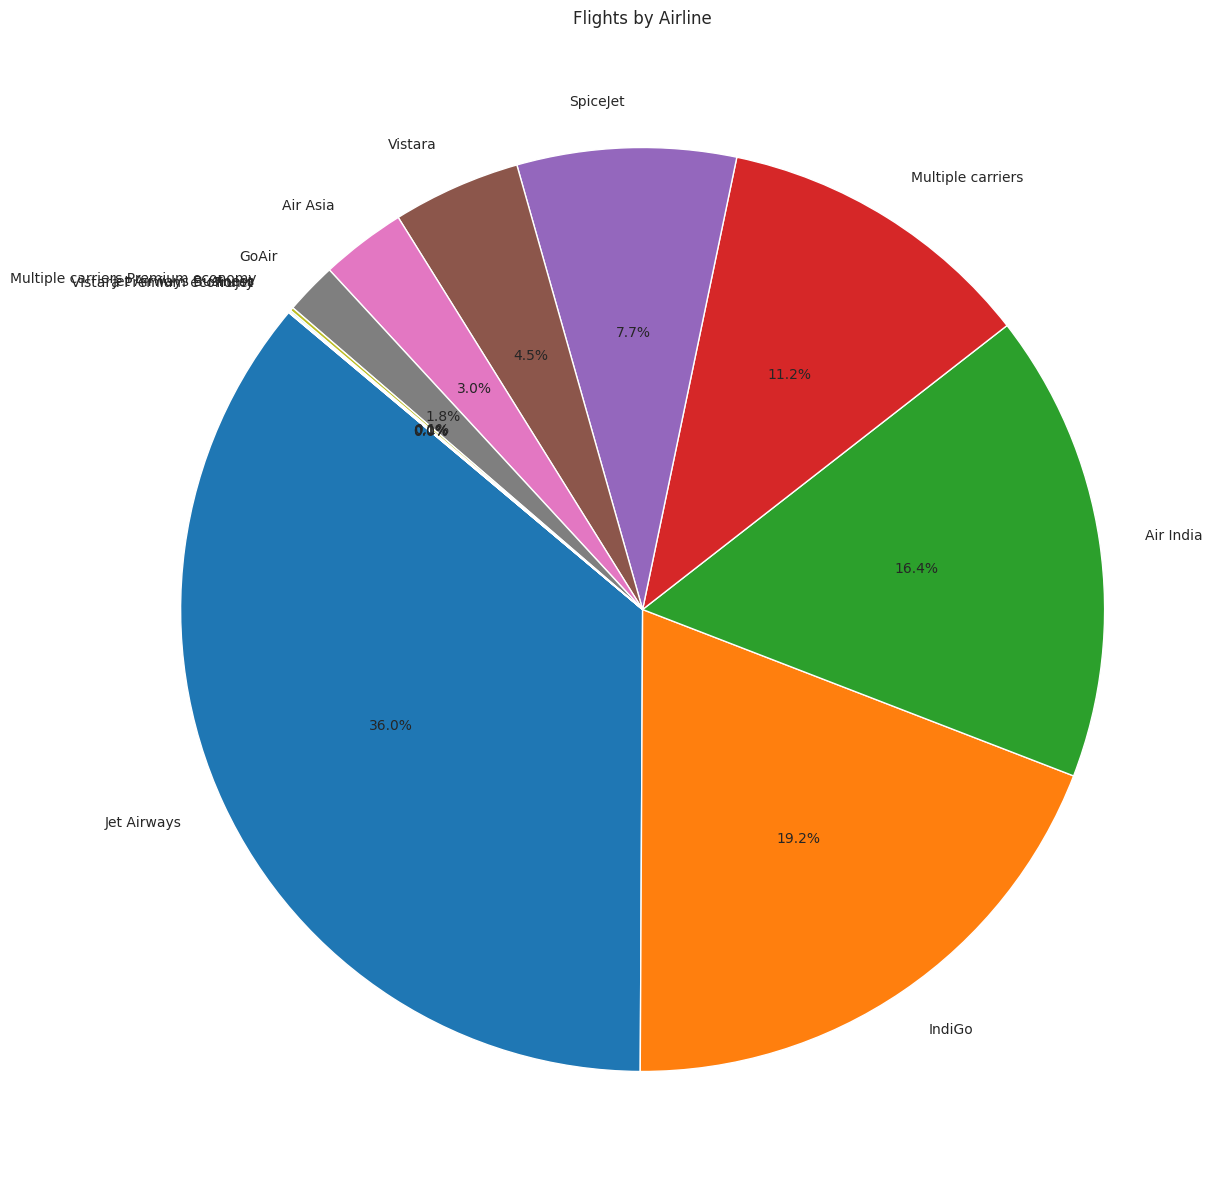

In [ ]:
plt.figure(figsize=(15, 15))
airline_counts = air_df['Airline'].value_counts()
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Flights by Airline')

**3. Total Revenue of each Airline**

In [ ]:
# Calculate total revenue for each airline
total_revenue = air_df.groupby('Airline')['Price'].sum().reset_index()
total_revenue

,Airline,Price
0,Air Asia,1783293
1,Air India,16838841
2,GoAir,1137045
3,IndiGo,11648071
4,Jet Airways,44817461
5,Jet Airways Business,350152
6,Multiple carriers,13039603
7,Multiple carriers Premium economy,148445
8,SpiceJet,3548717
9,Trujet,4140


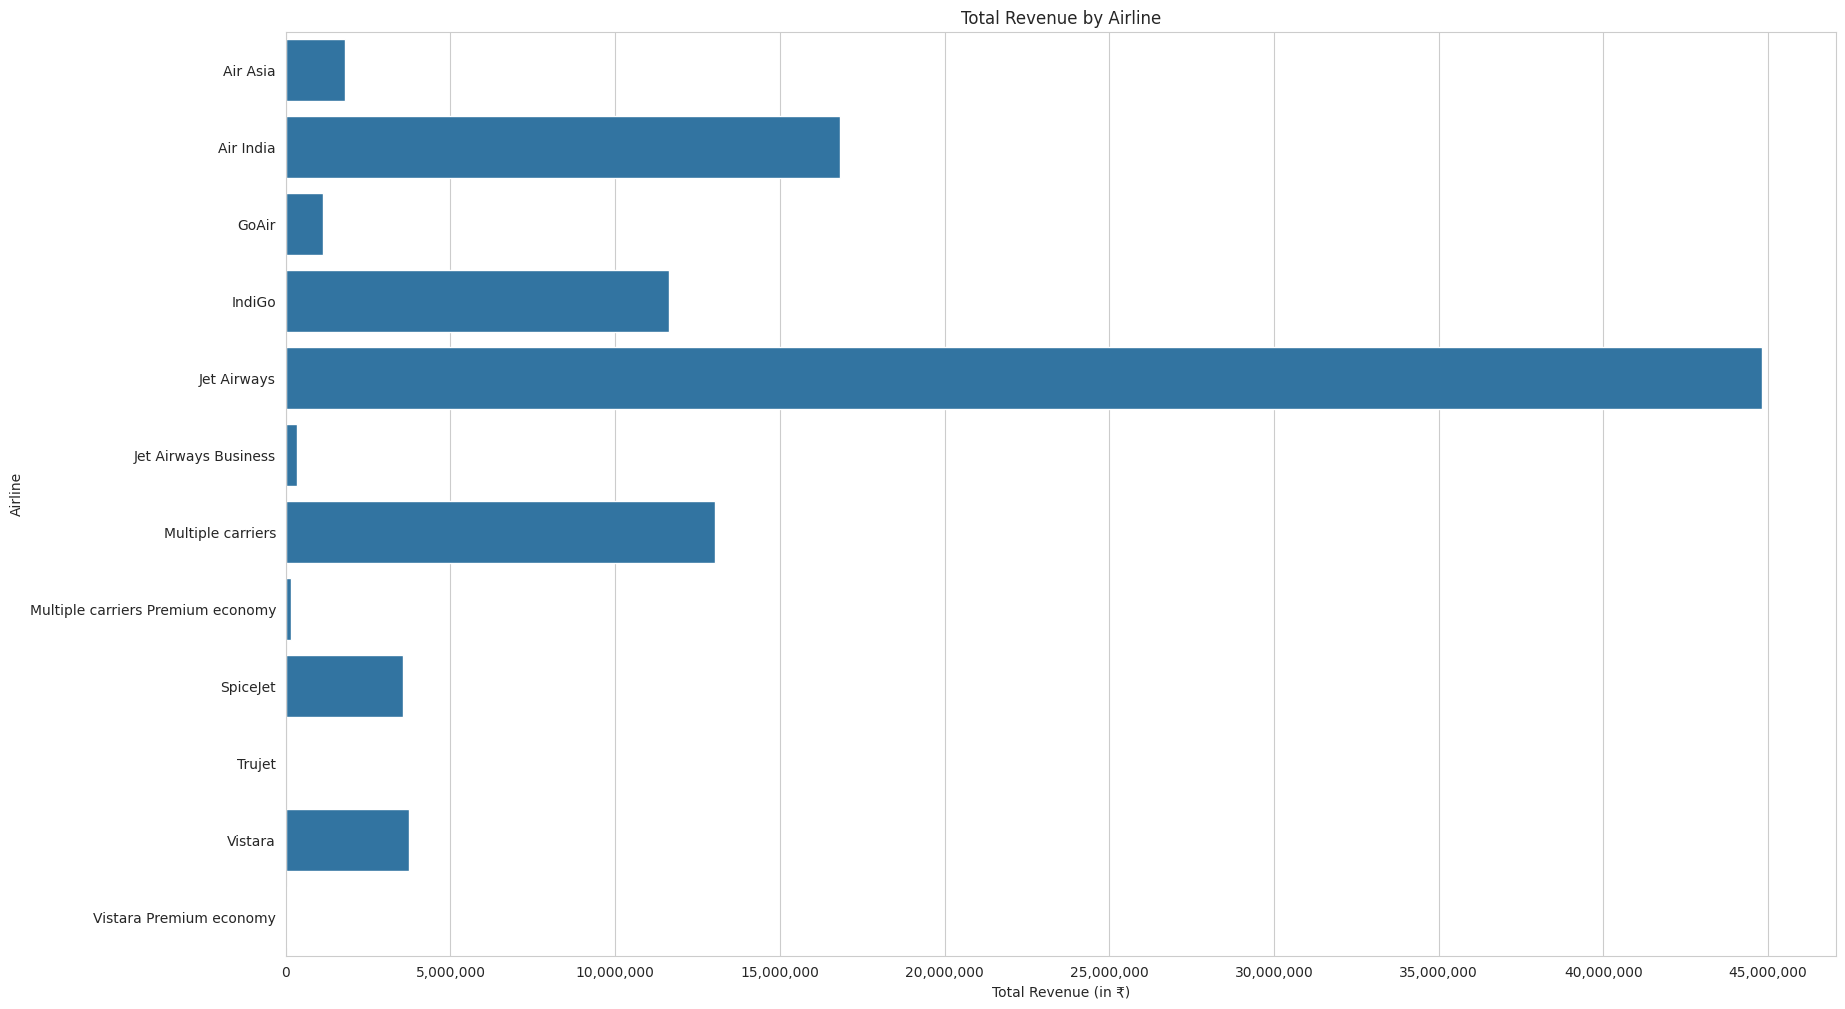

In [ ]:

from matplotlib.ticker import MaxNLocator, StrMethodFormatter

# Set the size of the plot
plt.figure(figsize=(20, 12))

sns.barplot(x = 'Price', y = 'Airline', data = total_revenue)
plt.title('Total Revenue by Airline')
plt.xlabel('Total Revenue (in ₹)')
plt.ylabel('Airline')

# Format the x-axis with thousands separator
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# Configure the number of bins on the x-axis for finer control
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))  # Adjust 'nbins' to get the desired granularity



The bar plot reveals significant disparities in total revenue among airlines. Jet Airways leads with a substantially higher revenue compared to other carriers, indicating its dominant market position during the analyzed period. Conversely, airlines like Trujet and Vistara Premium economy show minimal revenue, which might reflect either a niche market focus or limited operational scale. Notably, the presence of budget airlines like Air Asia and SpiceJet with moderate revenue figures suggests a competitive pricing strategy that balances lower ticket prices with high passenger volumes.


**Note:**

(a) The 'MaxNLocator' is a locator for Matplotlib that selects no more than N intervals at nice locations. It is used to automatically determine the optimal number of ticks on an axis, ensuring that the ticks are placed at "nice" intervals (like integers or multiples of 10).

(b) The 'StrMethodFormatter' is a string formatter for axis labels that uses Python's string formatting (specifically, the .format() method) to format the tick labels. This allows for flexible and customizable label formatting using standard Python string formatting syntax.


**4. Calculate mean and median flight durations**

In [ ]:
mean_flight_dur = air_df["Duration_Hours"].mean()
med_flight_dur = air_df["Duration_Hours"].median()

print("The mean flight duraiton is {:.2f} hours".format(mean_flight_dur))
print("The median flight duraiton is {:.2f} hours".format(med_flight_dur))

The mean flight duraiton is 10.72 hours
The median flight duraiton is 8.67 hours


**5. Average Flight Price by Month**

We had initially recorded that the data was recorded on specific dates during the months of March, April, May and June in the year 2019. Now, let's find the average flight price by month.

In [ ]:
avg_price_month = (air_df.groupby("month")["Price"].mean().round(2)).reset_index()

In [ ]:
print("The average flight price per month, where 1 corresponds to January and so on, is: \n\n")

avg_price_month

The average flight price per month, where 1 corresponds to January and so on, is: 




,month,Price
0,3,10673.21
1,4,5770.85
2,5,9127.25
3,6,8828.80


Text(0, 0.5, 'Average Price (in ₹)')

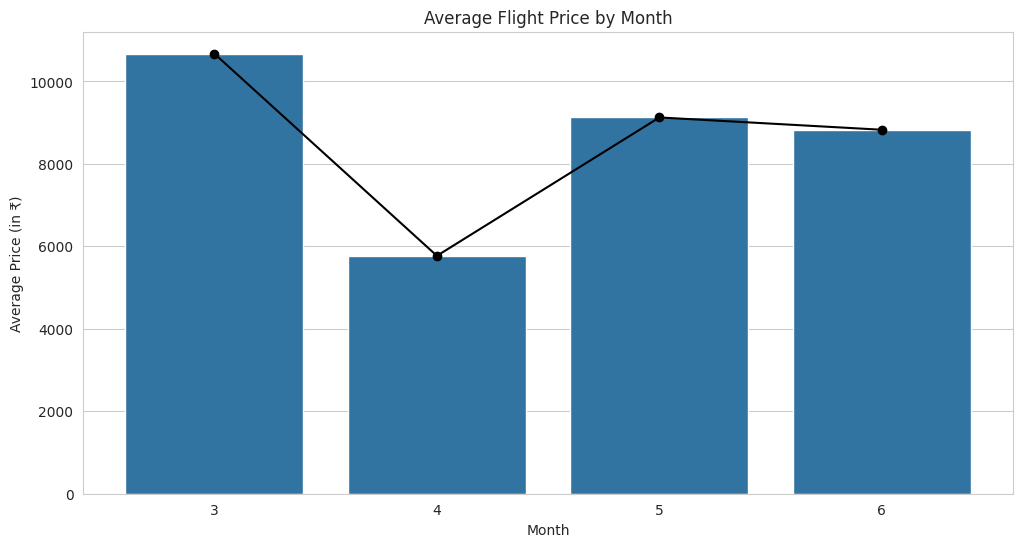

In [ ]:
avg_price_month = air_df.groupby("month")["Price"].mean().round(2).reset_index()

plt.figure(figsize=(12, 6))

# Plot the bar plot
sns.barplot(x='month', y='Price', data=avg_price_month)

# Plot the line plot
plt.plot(avg_price_month['month'].astype(str), avg_price_month['Price'], color='black', marker='o')

plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price (in ₹)')

The plot shows that the average flight price is highest in the month of March, followed by May. It is lowest in the month of April.

Here are some insights:

(i) The average flight price is highest in March. This trend might be influenced by several factors, including the end of the financial year in India, leading to increased business travel, and the onset of the spring season, which might see a rise in tourism and holiday travel. The end of the financial year often leads to increased business travel for meetings, audits, and financial planning, which can drive up flight prices.

(ii) The average flight price spikes after the sudden drop during April in the months of May and June. This could be attributed to the academic breaks in India which usually begin in the first week of May or the last week of April. Families all across India usually travel during these two months, thus driving up demand and prices.

(iii) April has the lowest average flight prices. This might be due to it being an off-peak travel period between the end of the fiscal year rush in March and the beginning of the summer vacation in May. Additionally, the weather during April can be quite warm in many parts of India, possibly deterring travel. So, April serves as a shoulder season, with reduced travel demand compared to the peak months. This can lead to lower average flight prices as airlines try to fill seats.

**6. Impact of Day of the Month on Flight Prices**

Text(0, 0.5, 'Average Price (in ₹)')

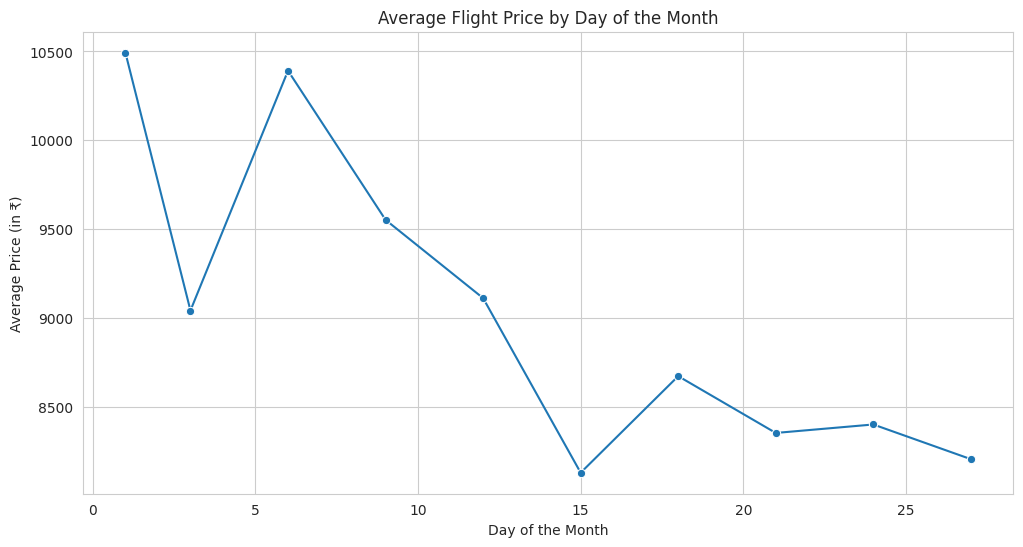

In [ ]:
avg_price_by_day_of_month = air_df.groupby("day")["Price"].mean().reset_index()
plt.figure(figsize = (12,6))
sns.lineplot(x = 'day', y = 'Price', data=avg_price_by_day_of_month, marker='o')
plt.title('Average Flight Price by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Price (in ₹)')

Here are some key insights:

(i) Flight prices peak at the beginning of the month, suggesting that the demand for flights may be higher around this time. This could be due to people traveling for business or returning from vacations, as the start of the month often aligns with salary payments, enabling more discretionary spending.

(ii) There is a noticeable dip in flight prices a few days into the month, possibly indicating a period of lower demand as people settle back into their routines after the initial travel spurt. The significant dip around the 15th indicates a lull in travel, which could be an optimal time for budget-conscious travelers to book flights.

(iii) The gradual decrease towards the end of the month suggests a period of lower demand, possibly as people prepare for the start of a new month, making it another potential time for cheaper travel options.

(iv) After the 7th, prices gradually decrease, reaching their lowest point around the 15th. This mid-month period might see less travel, leading to lower prices, which could be due to fewer holidays and a focus on regular work and school schedules. After this period, the prices slightly increase until the 17th. Prices start to decrease gradually again after the 17th, continuing this trend until the end of the month. This could be a period of generally lower travel demand as people wait for the next month's salary.

**7. Distrubution of Flight Prices**

Text(0, 0.5, 'Frequency')

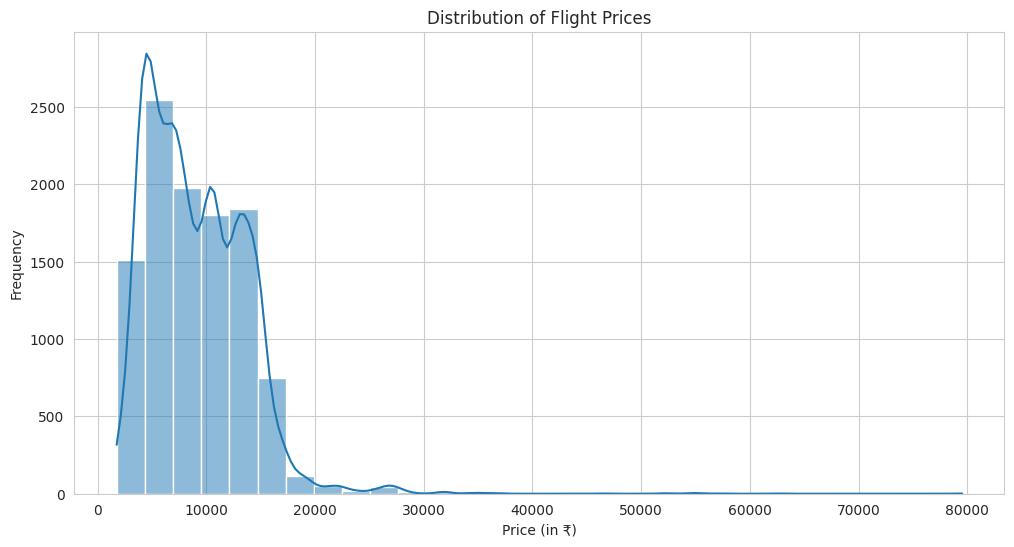

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(air_df['Price'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price (in ₹)')
plt.ylabel('Frequency')


The plot brings forth some valid insights:

(i) The plot shows that the flight prices show a right-skewed distribution, where most of the flight prices are clustered towards the lower end, and fewer flights have significantly higher prices. This indicates that while most flights are relatively affordable, there are a few premium-priced flights that raise the overall range of prices.

(ii) The peak of the histogram occurs at the lower price ranges, suggesting a significant number of flights are priced within an affordable range, reflecting standard economy class fares. This could be indicative of the competitive pricing strategies adopted by budget airlines and the high volume of short domestic flights in India.

(iii) Apart from the afforable flights, there is a long-tail extending towards the higher price ranges. This signifies that there are some flights with very high prices. This could correspond to long-haul flights, premium airline services, business class tickets, or flights during peak travel seasons and holidays.

(iv) The cities involved (New Delhi, Bangalore, Cochin, Kolkata, Delhi, Hyderabad) are the major metropolitan areas of India, so we can expect the volume of travel to be quite high. This high volume of travel likely drives competitive strategies among airlines to offer lower-priced tickets to attract more passengers.

(v) We had noted earlier that Jet Airways and IndiGo had the most flights during this period. The dominance of these budget airlines in the Indian market likely contributes to the concentration of flights in the lower price range. These airlines focus on providing affordable travel options to a large customer base.

**8. Price Distribution Across Different Airlines**

Text(0, 0.5, 'Price (in ₹)')

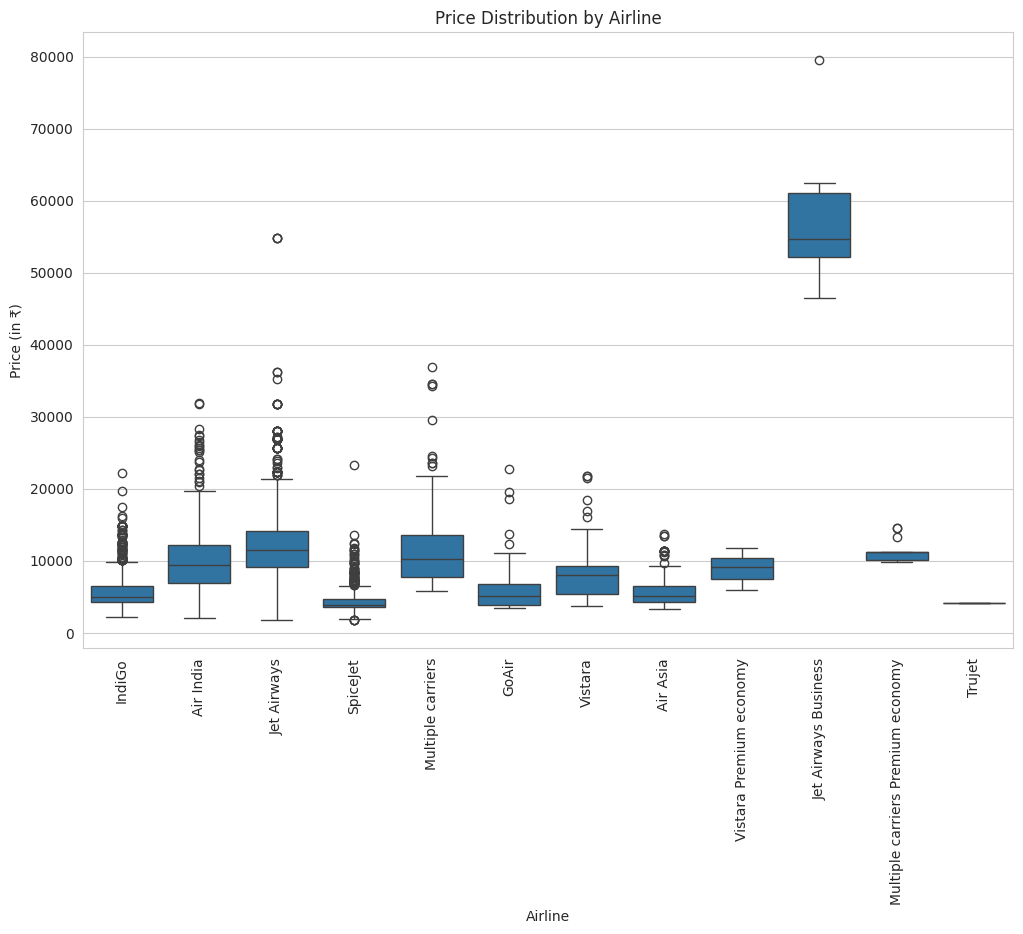

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Airline', y='Price', data=air_df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price (in ₹)')


Here are some insights:

(i) Most of the airlines offer their tickets at a price lower than ₹15,000. However, the box plots show a wide range of prices across different airline.

(ii) Although Jet Airways' ticket prices are generally average, Jet Airways Business has priced their tickets significantly higher than those of other airlines, indicating that it offers some of the most expensive flights with premium services.

(iii) Airlines such as IndiGo, Spicejet, Jet Airways, and Air India have their average ticket price on the lower end of the spectrum highlighting their affordable options. However, they have significant number of outliers on the higher end suggesting that they offer premium services or flights that are considerably more expensive than their median prices.

(iv) Airlines like Air Asia, Trujet, Vistara and GoAir show relatively consistent pricing with fewer outliers and a narrower interquartile range, indicating more stable pricing strategies.

(v) The median price for each airline varies significantly. For example, low-cost carriers like IndiGo and SpiceJet have lower median prices compared to full-service carriers like Jet Airways and Air India.

(vi) The presence of outliers and a wide range in prices for several airlines suggests a competitive pricing strategy to cater to different market segments, including budget and premium travelers.

**9. Distribution of Flight Durations & Their Relationship with Price**

Text(0, 0.5, 'Frequency')

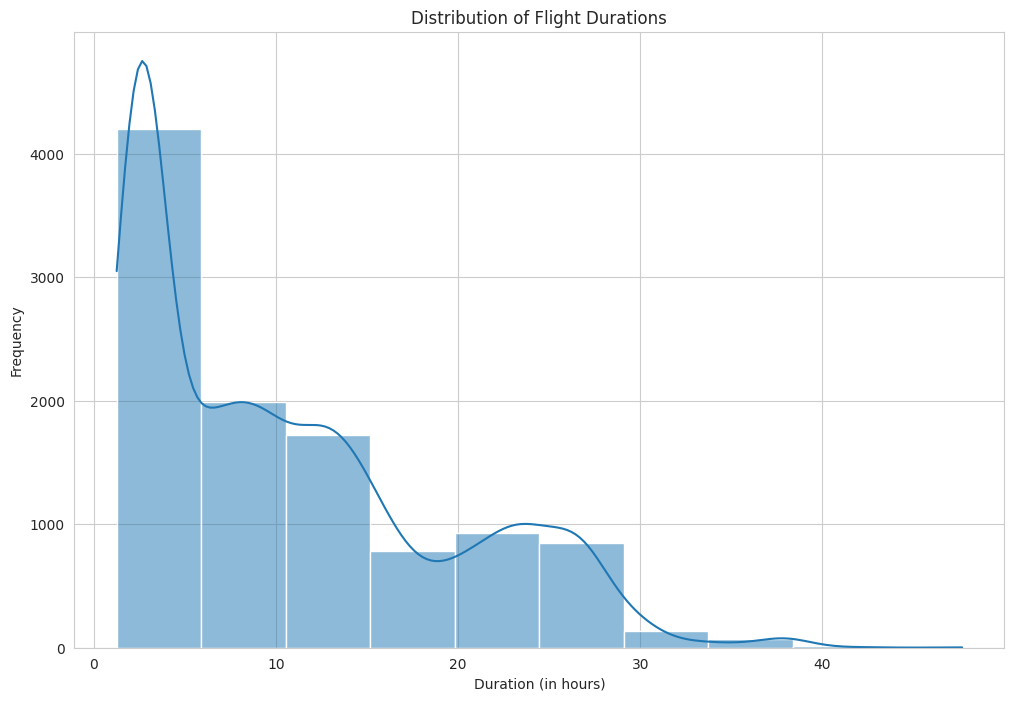

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(air_df["Duration_Hours"], bins=10, kde=True)
plt.title('Distribution of Flight Durations')
plt.xlabel('Duration (in hours)')
plt.ylabel('Frequency')


Here are some insights:

(i) The histogram clearly shows that majority of flights have shorter duration, with the frequency of flights decreases as the duration increases. This is likely because shorter flights are more common in domestic travel within India, where major cities are relatively close to each other.

(ii) Most of the flights fall in the range 0-5 hrs, which is typical for domestic flights between major cities in India.

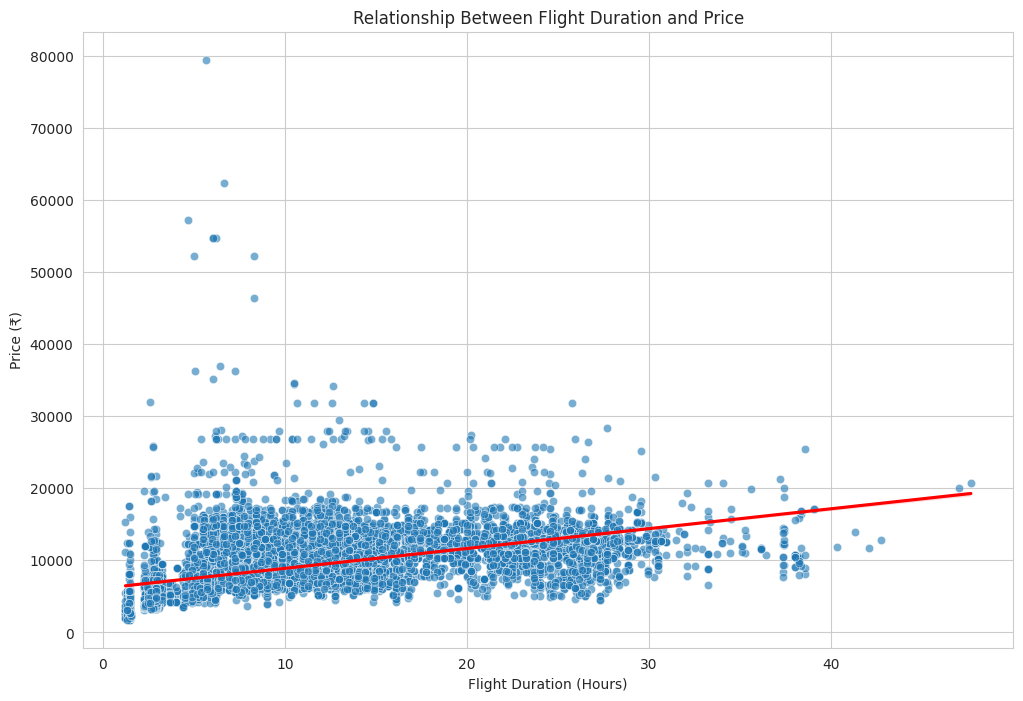

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Duration_Hours', y='Price', data=air_df, alpha=0.6)
sns.regplot(x='Duration_Hours', y='Price', data=air_df, scatter=False, color='red')
plt.title('Relationship Between Flight Duration and Price')
plt.xlabel('Flight Duration (Hours)')
plt.ylabel('Price (₹)')
plt.show()

Now, to compare the relationship between flight price and duration of the price, I have used a scatter plot. Here are some insights derived from the graph:

(i)  The scatter plot with the regression line shows a positive linear relationship between flight duration and price. This indicates that, generally, longer flights tend to be more expensive. This trend is expected as longer flights incur higher operational costs, such as fuel, crew time, and maintenance.

(ii) While there is an overall increasing trend, the scatter plot also shows significant variation in prices for flights of the same duration. This variation could be due to several factors, including the different pricing strategies of different airlines even for flights of simialr durations, differences in service classes (economy, business, etc.), how far in advance the ticket was booked, demand, and other reasons.

(iii) The scatter plot indicates several outliers on the higher end of the price spectrum for similar durations. This could be due to flights offering premium services or business class tickets, which tend to be more expensive, last-minute bookings, or special cases like specific routes, limited availability, or high-demand periods, all of which can cause certain flights to be more expensive.

**10. Relationship between Flight Duration, Cost & Number of Stops**

Text(0, 0.5, 'Frequency')

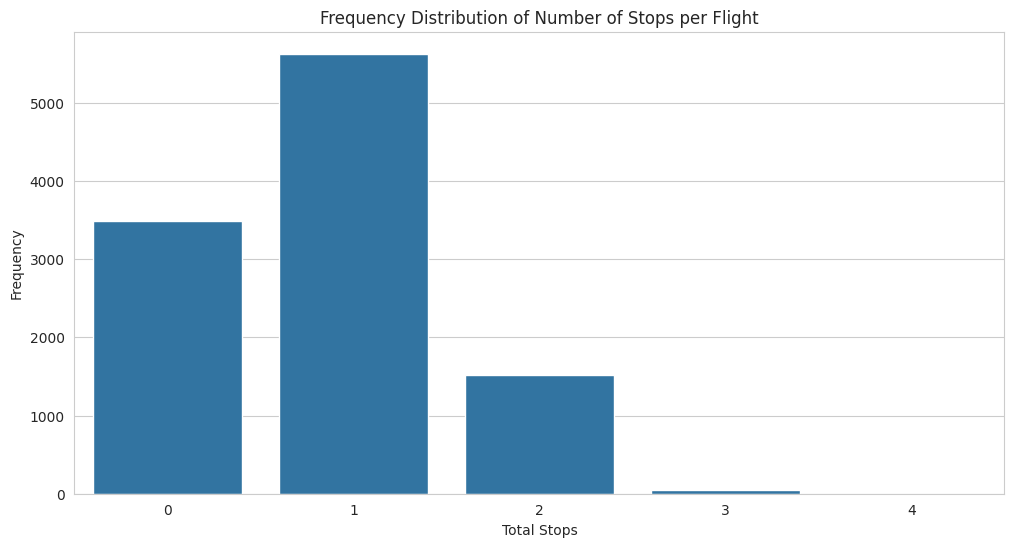

In [ ]:
stops_distribution = air_df['Total_Stops'].value_counts().reset_index()
stops_distribution.columns = ['Total_Stops', 'Frequency']
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Stops', y='Frequency', data=stops_distribution)
plt.title('Frequency Distribution of Number of Stops per Flight')
plt.xlabel('Total Stops')
plt.ylabel('Frequency')


The bar graph cleary shows that most flights are direct or have 1 stop. This indicates a preference for shorter and more direct routes. However, there are some flights which have 2 stops. Very few flights have 3 or 4 stops.

Now, let's find out if the number of stops made by a flight have any relationship with the duration of the flight and cost of the ticket. Let's analyse the same through the following plots:

Text(0, 0.5, 'Flight Duration (Hours)')

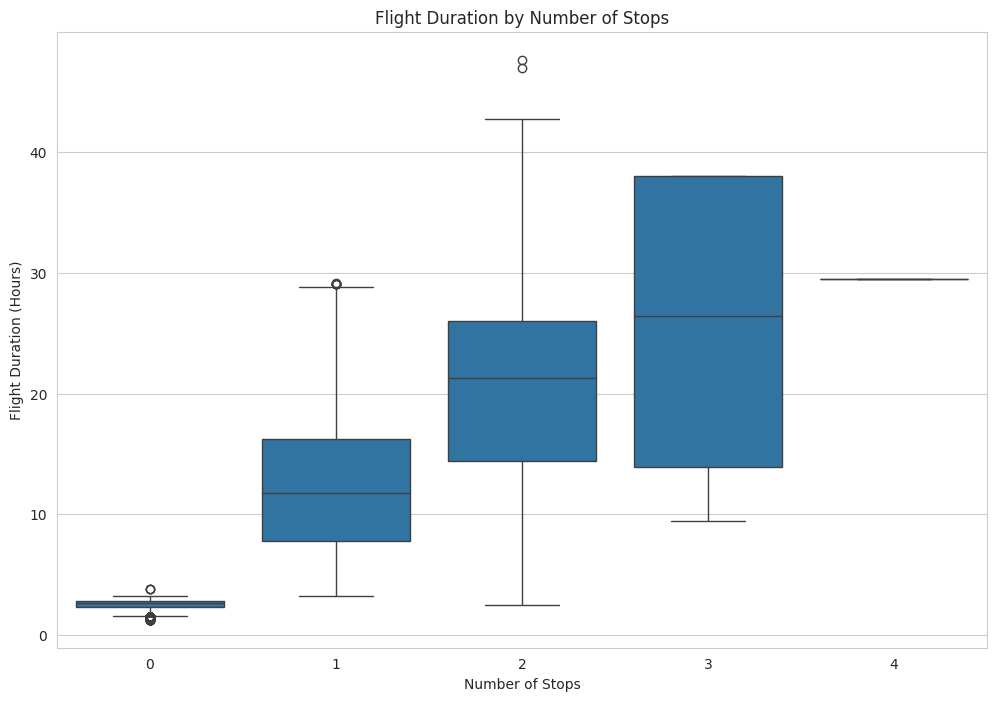

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Total_Stops', y='Duration_Hours', data=air_df)
plt.title('Flight Duration by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Flight Duration (Hours)')


Clearly, as the number of stops made by a flight increases, the flight duration also increases (in general) due to layovers.

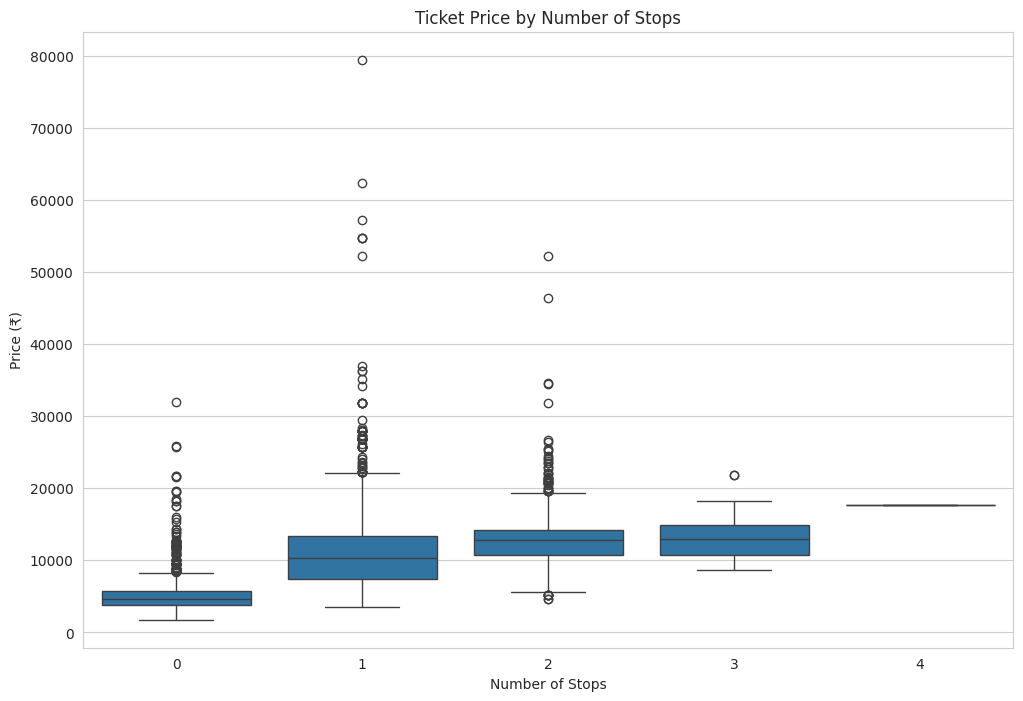

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Total_Stops', y='Price', data=air_df)
plt.title('Ticket Price by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price (₹)')


Text(0, 0.5, 'Average Price (₹)')

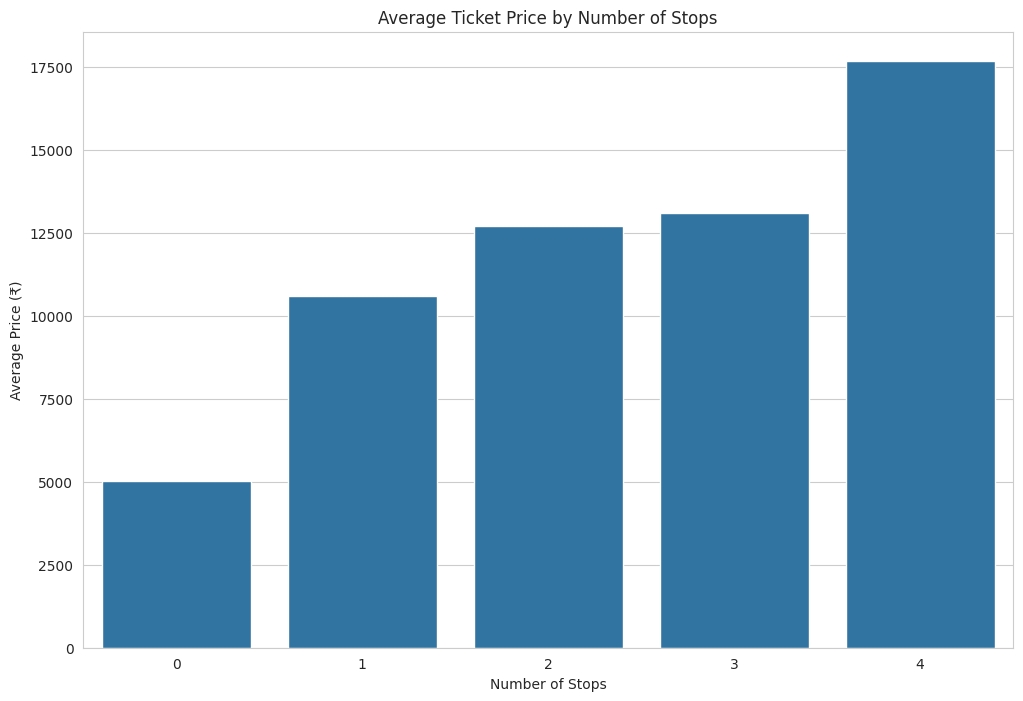

In [ ]:
avg_price_stops = air_df.groupby('Total_Stops')['Price'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Stops', y='Price', data=avg_price_stops)
plt.title('Average Ticket Price by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Average Price (₹)')


Here are some insights:

(i) Direct flights (0 stops) have the shortest durations, with less variability in duration. Flights with 1 stop have a broader range of durations, indicating some variability in layover times. Flights with 2 stops or more have significantly longer durations and greater variability.

(ii) Travelers who prioritize shorter travel times should opt for direct flights. However, flights with one stop can also be a reasonable option if direct flights are not available. The increased variability in durations for flights with more stops indicates that layover times can vary widely, affecting the overall travel time.

(iii) The scatter plot shows a positive trend between flight duration and price, indicating that longer flights tend to be more expensive. Travelers should expect to pay more for longer flights. However, the presence of outliers indicates that price alone is not solely determined by duration. Other factors such as airline, route, and service level also play a significant role.

(iv) Finally, the last boxplot and bar graph shows a linearly increasing relationship between  numebr of stops and price, which may be surprising. This can be explained by the added costs of handling multiple stops.  The preference for direct and one-stop flights is clear, as they offer shorter travel times and generally lower prices. The higher average prices for flights with more stops can be attributed to additional operational costs and the premium services often associated with longer, multi-stop journeys. Travelers should be aware that while direct flights are generally cheaper and shorter, multi-stop flights might be necessary for less common routes or might offer added services that justify the higher cost.

**11. Average Flight Prices by Day of the Week**

Text(0, 0.5, 'Average Price (in ₹)')

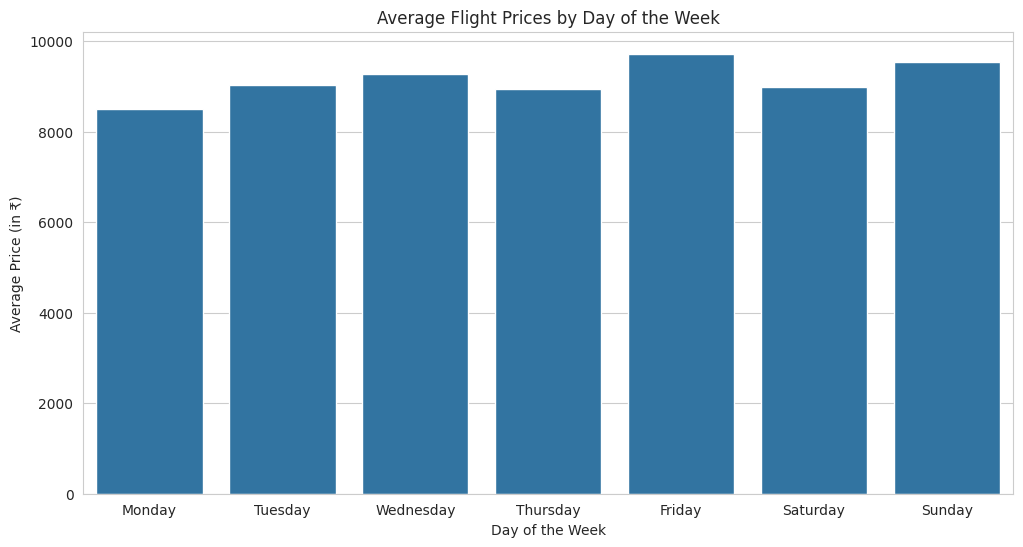

In [ ]:
air_df["day_of_week"] = air_df["Flight_Date"].dt.day_name()
avg_price_by_day = air_df.groupby("day_of_week")["Price"].mean().reset_index()
plt.figure(figsize = (12,6))
sns.barplot(x = "day_of_week", y = "Price", data = avg_price_by_day, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Flight Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price (in ₹)')

The average flight prices vary across the days of the week. Monday is the cheapest day to fly, making it an ideal choice for budget-conscious travelers. Prices increase gradually through the week, with a notable dip on Thursday. Friday has the highest prices, reflecting higher demand. The prices then drop on Saturday before rising again on Sunday. This information can be useful for travelers looking to optimize their travel expenses by choosing to fly on less expensive days.

Here are some insights:


(i) Monday is observed as the cheapest day to fly. This could be due to lower demand at the start of the workweek, making it an ideal day for budget-conscious travelers.

(ii) From Monday to Wednesday, there is a steady increase in average flight prices. This trend suggests a gradual rise in demand as the workweek progresses, potentially due to business travel.

(iii) There is a noticeable drop in prices on Thursday. This could be attributed to airlines offering discounts to fill seats before the weekend rush, making it a good day to find deals.

(iv) Friday sees the highest average flight prices. This is likely due to the increased demand from travelers starting their weekend trips, leading to higher prices.

(v) Saturday shows a decreasing flight prices compared to Friday. Sunday sees an increase in average flight prices again, probably as travelers prepare to return home or get ready for the upcoming week.

**11. Impact of Departure Times**

Text(0, 0.5, 'Frequency')

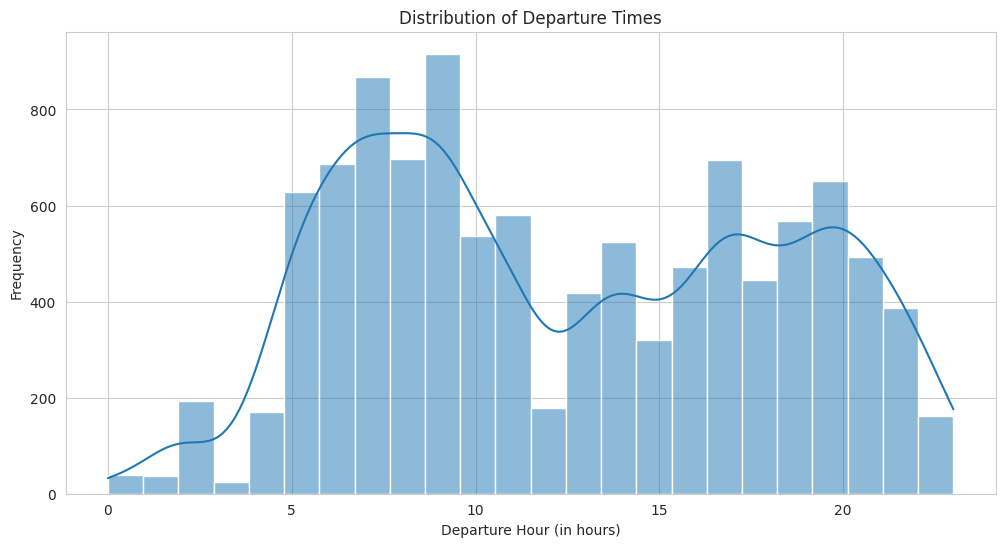

In [ ]:
plt.figure(figsize = (12,6))
sns.histplot(air_df["Dep_hours"], bins = 24, kde = True)
plt.title('Distribution of Departure Times')
plt.xlabel('Departure Hour (in hours)')
plt.ylabel('Frequency')

The plot shows that:

(i) The number of flights remain lowest from 12AM to 5AM
(ii) The number of flights is highest in the time interval from 5AM to 11AM, reaching its peak at about 9:30 AM.
(iii) The number of flight gradually drops and remains relativelt low from 12PM to 3PM.
(iv) It starts to rise again hitting peaks at around 4:30PM and 7:30 PM and gradually starts to drop as we approach midnight.

- This indicates a general preference for morning and evening flights among passengers. Passengers do not generally prefer late-night and early-morning-departures, likely due to passenger convenience and airport operation schedules. The higher tendency to fly during the day may be due to the desire of business travelers and other passengers to arrive their destinations early in the day. Same goes for the evening travelers, who might desire to reach their destinations before midnight. The period from 12PM to 3PM sees lesser flights probably because these are peak work hours and is less convenient for business meetings.

- The peak times for departures are early morning (5AM to 11AM) and late afternoon to evening (4:30PM to 7:30PM). These periods are optimal for travelers who prefer to start their journey early or after completing their daily activities.

- Airlines can maximize occupancy and revenue by scheduling more flights during peak travel times. Early morning and evening flights are particularly popular, so adding more flights during these times can cater to higher demand.

- Airlines might also consider adjusting prices based on demand. Flights during peak hours could be priced higher due to increased demand, while flights during off-peak hours (12AM to 5AM and 12PM to 3PM) could be offered at discounted rates to attract more travelers.

- To balance the load and improve utilization, airlines could offer promotions for flights during the off-peak hours. This can help attract budget-conscious travelers who are flexible with their travel times.



**12. Relationship Between Source and Destination on Flight Prices**

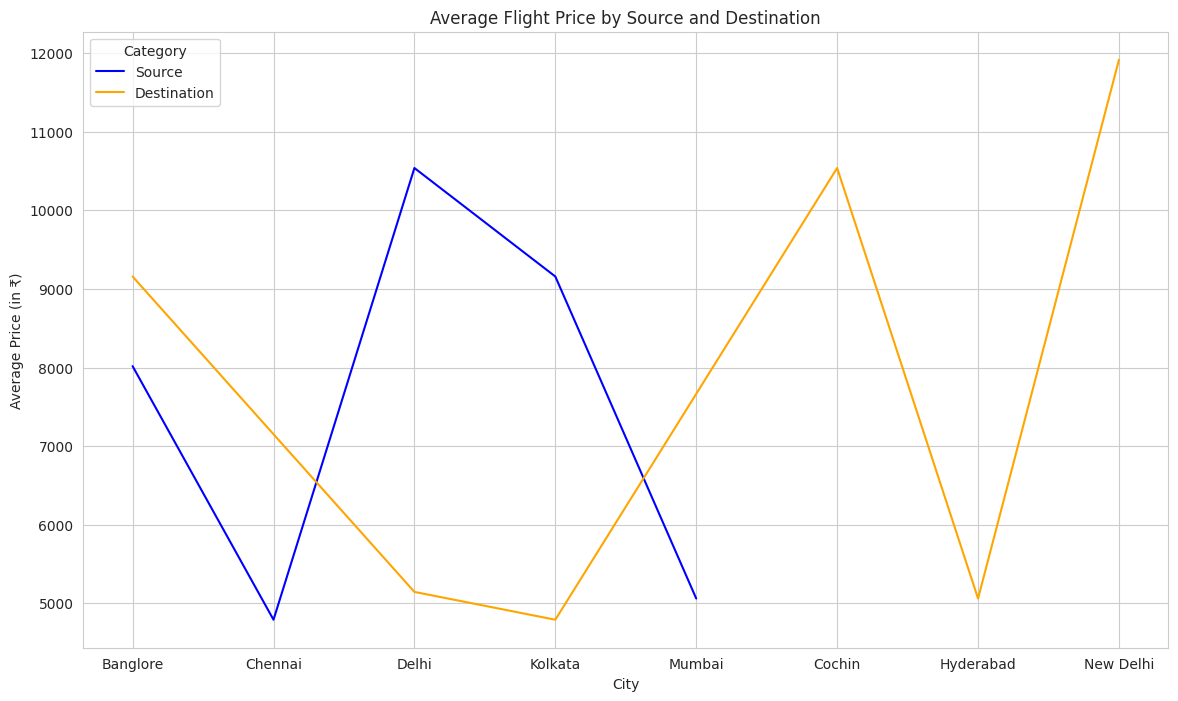

In [ ]:
avg_price_source = air_df.groupby('Source')['Price'].mean().reset_index()
avg_price_destination = air_df.groupby('Destination')['Price'].mean().reset_index()

plt.figure(figsize=(14, 8))

sns.lineplot(x='Source', y='Price',data=avg_price_source, label='Source', color='blue')
sns.lineplot(x='Destination', y='Price',data=avg_price_destination, label='Destination', color='orange')

# Customize the plot
plt.title('Average Flight Price by Source and Destination')
plt.xlabel('City')
plt.ylabel('Average Price (in ₹)')
plt.legend(title='Category')

Here are some insights:

(i) In general, flight tickets are priced higher when the plane departs from Delhi or Kolkata. This could be due to higher demand, better connectivity, or airport-related costs in these cities.

(ii) The prices are relatively lower if the flight departs from Chennai or Mumbai.Possible reasons could include higher competition among airlines, different demand patterns, or airport fee structures.

(iii). In general, flight tickets are priced higher if the plane flies to Cochin or New Delhi.This may be due to high demand, fewer flights leading to limited supply, or airport-related costs.

(iv) The prices are relatively lower if the plane flies to Delhi or Kolkata. Potential reasons include better flight connectivity, higher competition among airlines, or strategic pricing by airlines.

**13. Flight Frequency by Source and Destination**

Text(145.72222222222223, 0.5, 'Source City')

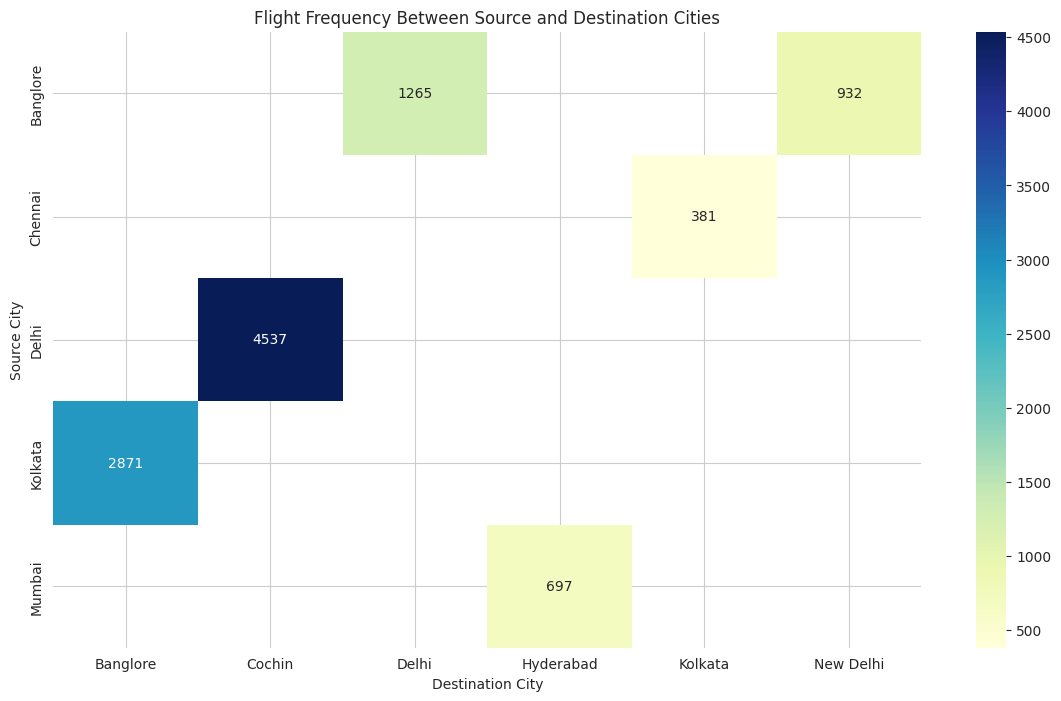

In [ ]:
flight_frequency = air_df.groupby(['Source', 'Destination']).size().reset_index(name='Frequency')

plt.figure(figsize=(14, 8))
sns.heatmap(flight_frequency.pivot(index='Source', columns='Destination', values='Frequency'), annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Flight Frequency Between Source and Destination Cities')
plt.xlabel('Destination City')
plt.ylabel('Source City')

Here are some insights:

(i) Cochin-Delhi is the highest frequency route, indicating a critical travel corridor. This might be due to business connections, government travel, or significant tourism flow between these cities.

(ii) The Bangalore-Kolkata route is also a high-frequency route (2nd highest). This shows the strong connectivity and demand between these two cities, which could be driven by business ties, educational connections, or tourism.

(iii) The Delhi-Bangalore route also shows a high frequency, reflecting the significant business and tech industry connections between these major cities.

(iv) The Hyderabad-Mumbai route shows low flight frequency, indicating lower demand for direct flights between these cities. This might be due to alternative transportation options or less business and tourism travel.

(v) Kolkata-Chennai is another low-frequency route, suggesting limited demand, which could be attributed to geographical distance or lower economic ties between these cities.

**14. Relationship Between Airline and Number of Stops**

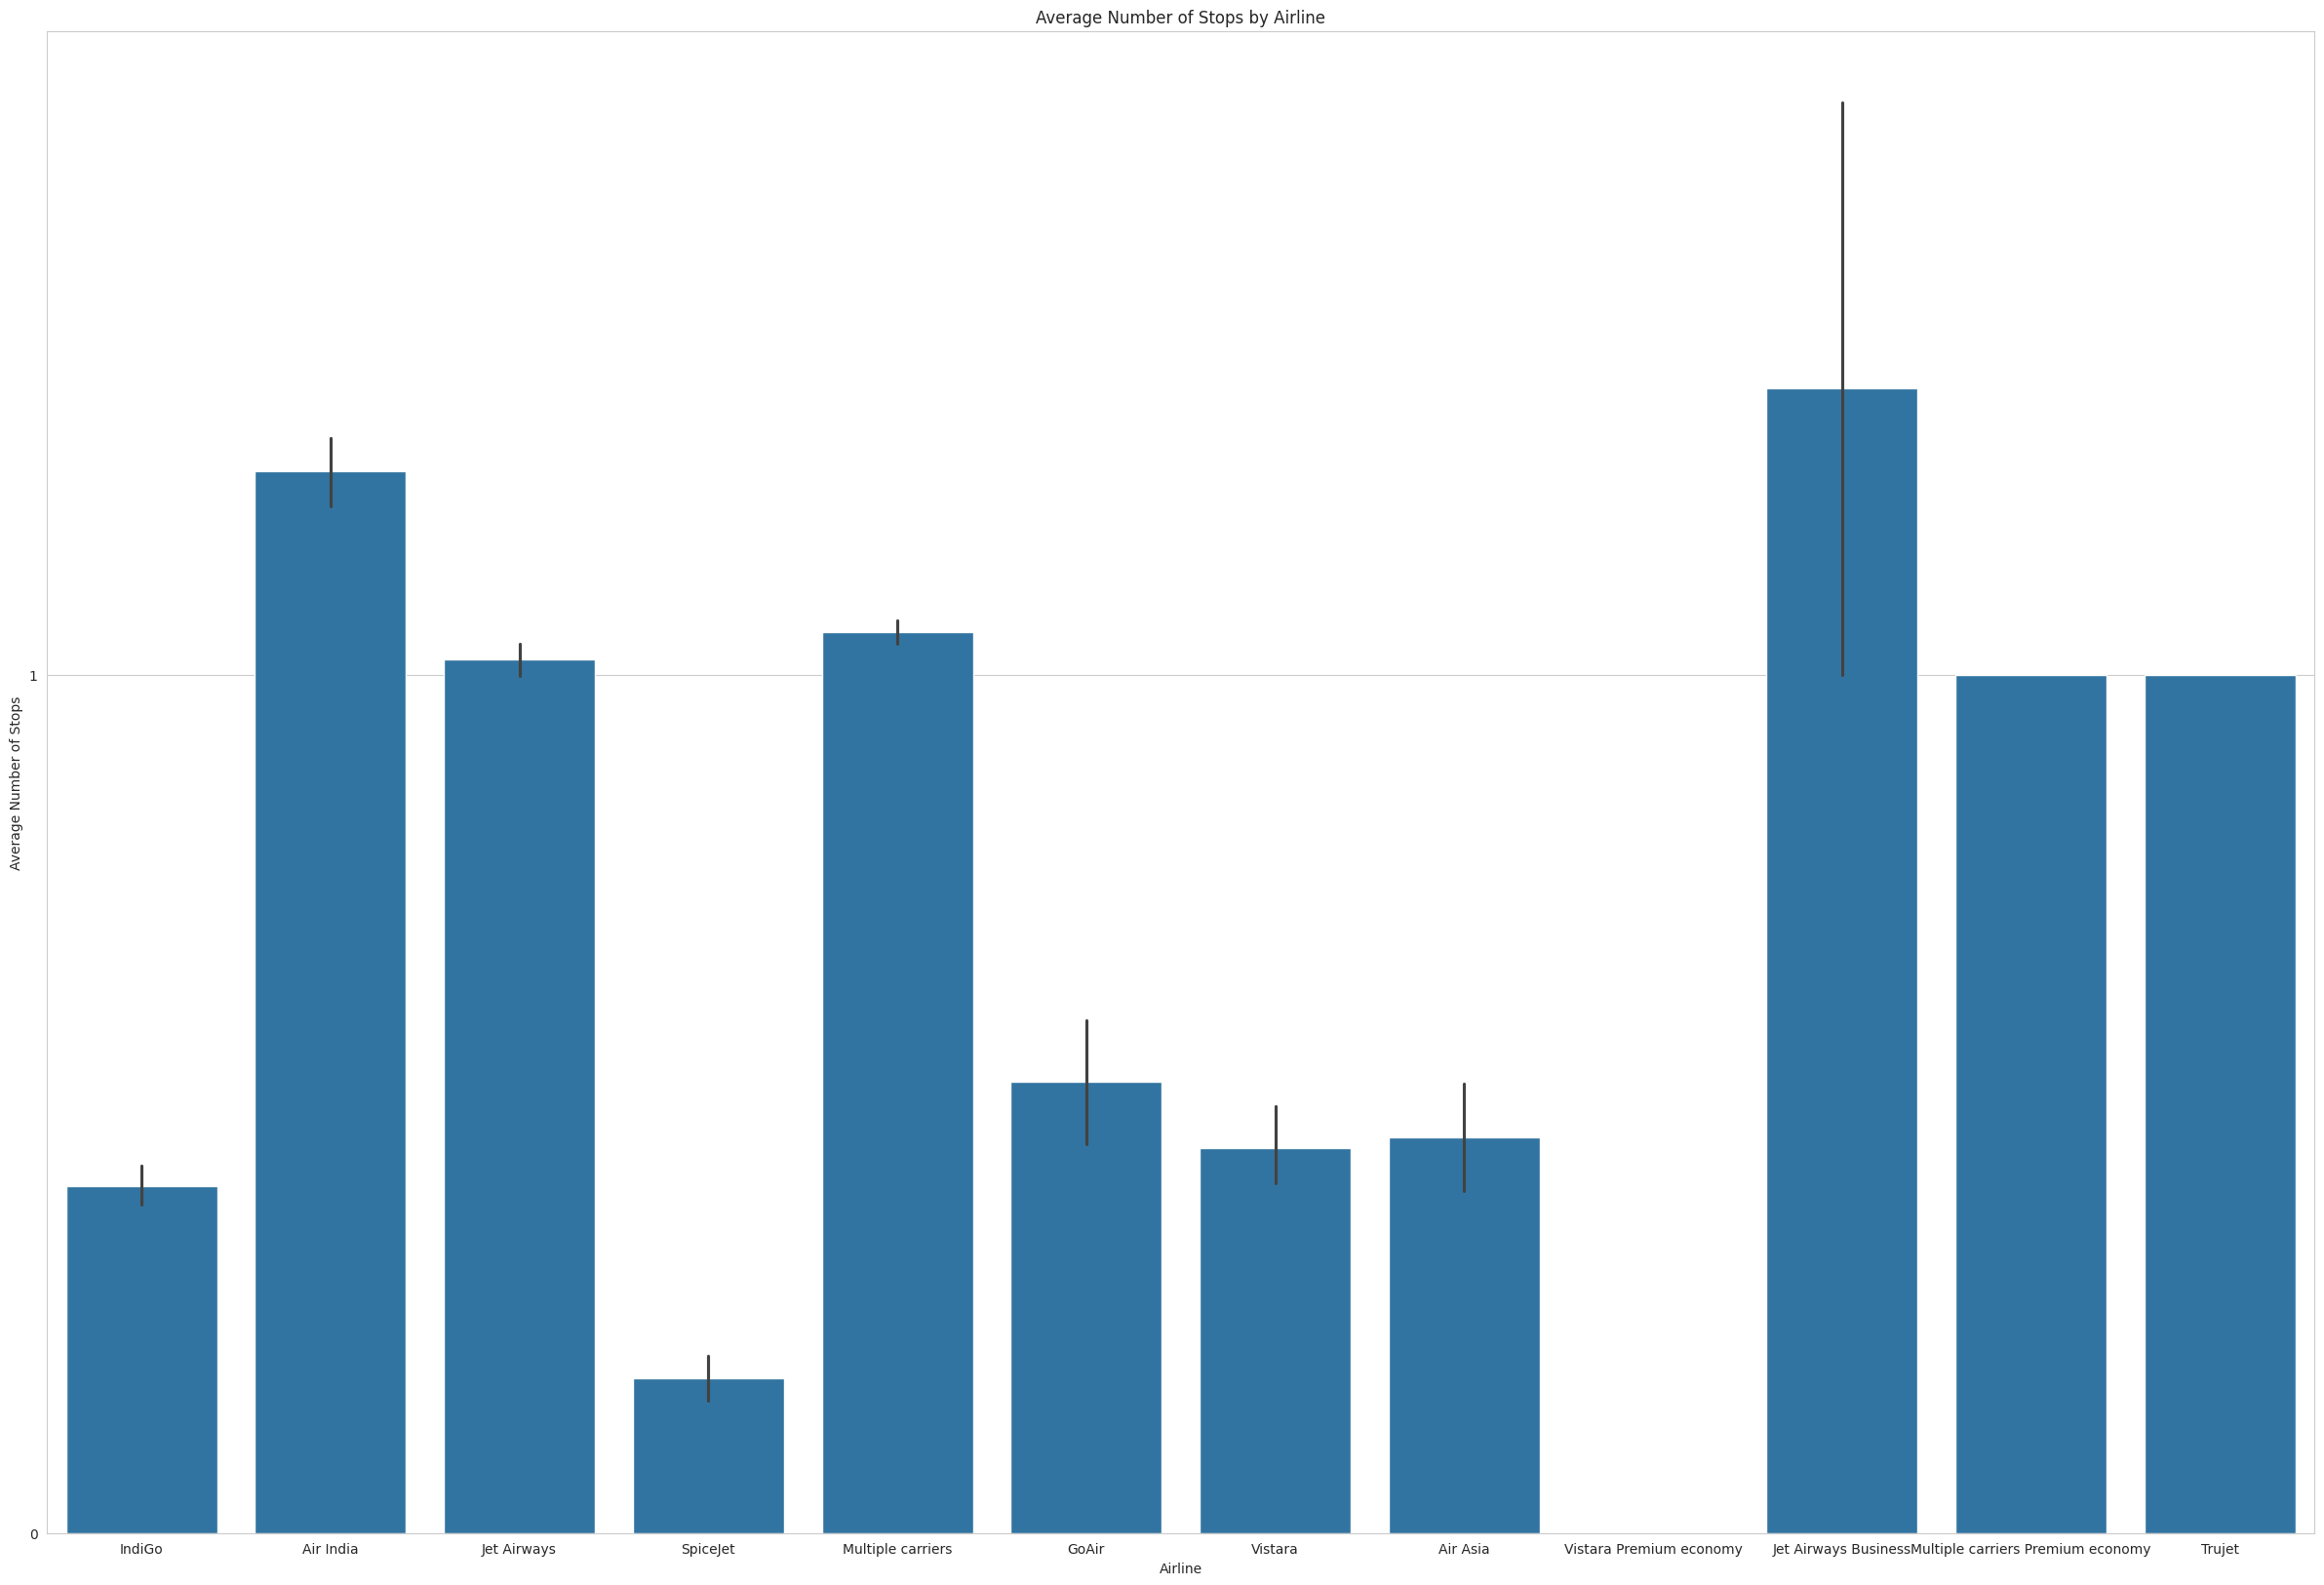

In [ ]:
plt.figure(figsize = (30,20))
sns.barplot(x = 'Airline', y = 'Total_Stops', data = air_df)
plt.title('Average Number of Stops by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Number of Stops')

# Ensure y-axis numbers are positive integers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

Here are some key insights:

(i) IndiGo and Spicejet typically offer more direct flights as indicated by the lower average number of stops.

(ii) GoAir, Vistara, and Air Asia have a slightly higher average number of stops, indicating a mix of direct and multi-stop flights.

(iii) Flights like Trujet, Air India, Jet Airways show a higher average number of stops.

**15. Frequency of Flights by Source City & Destination City**

Let's analyse the frequency of flights by source city with a count plot.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

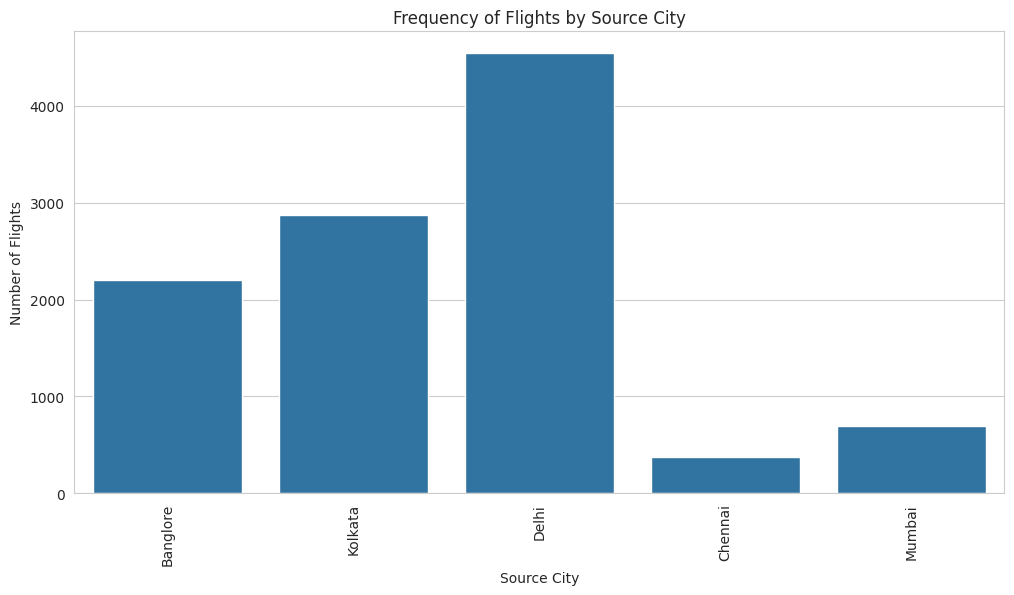

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Source', data=air_df)
plt.title('Frequency of Flights by Source City')
plt.xlabel('Source City')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

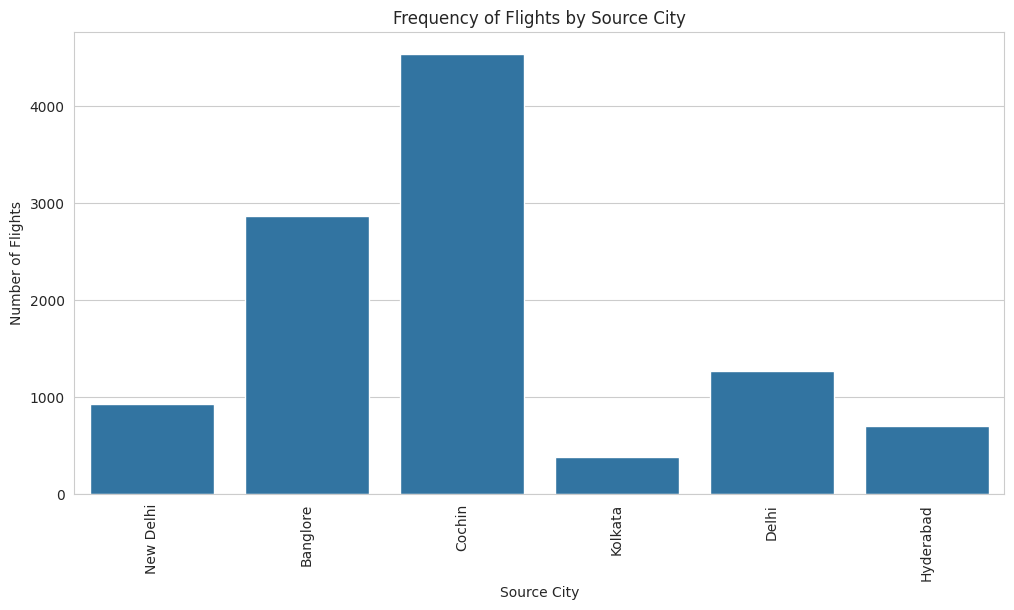

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Destination', data=air_df)
plt.title('Frequency of Flights by Source City')
plt.xlabel('Source City')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)


The plot shows that the number of flights is highest where the source city is Delhi, followed by Bangalore and Kolkata. Its comparatively lower in Chennai and Mumbai.

Here are some insights:

(i) The plot clearly indicates that Delhi is the most dominant travel hub, having the highest number of flights departing and a considerably high amount of flights arriving. This reflects Delhi's status as a major metropolitan and economic center in India, attracting significant air traffic.

(ii) Following Delhi, Bangalore and Kolkata also have a high frequency of departing flights & arriving flights. Bangalore's status as the IT capital of India and Kolkata's position as a major cultural and economic hub in Eastern India contribute to their high flight volumes.

(iii) Chennai and Mumbai, while having substantial flight traffic, show comparatively lower numbers than Delhi, Bangalore, and Kolkata in terms of departing flights. This could be due to various factors such as airline operations, airport capacity, or passenger demand.

(iv) The higher number of flights from certain cities may also reflect the economic activity in those regions. Cities with higher economic activities tend to have more business and leisure travelers, contributing to the increased flight frequencies.

**16. Which airline has the highest average flight price?**

In [ ]:
highest_avg_price_airline = air_df.groupby('Airline')['Price'].mean().idxmax()
highest_avg_price = air_df.groupby('Airline')['Price'].mean().max()
print(f"The airline with the highest average flight price is {highest_avg_price_airline} with an average price of ₹{highest_avg_price:.2f}.")

The airline with the highest average flight price is Jet Airways Business with an average price of ₹58358.67.


**17. What is the median number of stops for flights departing from each source city?**

In [ ]:
median_stops_source = air_df.groupby('Source')['Total_Stops'].median().reset_index()
print("Median number of stops for flights departing from each source city: \n")
print(median_stops_source)

Median number of stops for flights departing from each source city: 

     Source  Total_Stops
0  Banglore          0.0
1   Chennai          0.0
2     Delhi          1.0
3   Kolkata          1.0
4    Mumbai          0.0


**18. Find the flight with the longest duration and its details**

In [ ]:
longest_flight = air_df.loc[air_df["Duration_Hours"].idxmax()]
print("Details of the flight with the longest duration: \n")
print(longest_flight)

Details of the flight with the longest duration: 

Airline                   Jet Airways
Source                          Delhi
Destination                    Cochin
Total_Stops                         2
Price                           20694
day                                 6
month                               3
year                             2019
Dep_hours                          19
Dep_min                            10
Arrival_hours                      18
Arrival_min                        50
Flight_Date       2019-03-06 00:00:00
Duration_Hours                  47.67
day_of_week                 Wednesday
Name: 10456, dtype: object


**19. Which day of the month has the highest total flight revenue?**

In [ ]:
highest_revenue_day = air_df.groupby("day")["Price"].sum().idxmax()
highest_revenue = air_df.groupby('day')['Price'].sum().max()
print(f"The day of the month with the highest total flight revenue is day {highest_revenue_day} with a total revenue of ₹{highest_revenue:.2f}.")

The day of the month with the highest total flight revenue is day 9 with a total revenue of ₹13429373.00.


**20. Calculate the average flight duration for each destination city.**

In [ ]:
avg_duration_destination = air_df.groupby("Destination")["Duration_Hours"].mean().reset_index()
print("Average flight duration for each destination city: \n")
print(avg_duration_destination)

Average flight duration for each destination city: 

  Destination  Duration_Hours
0    Banglore       12.453824
1      Cochin       13.633011
2       Delhi        2.861130
3   Hyderabad        3.202568
4     Kolkata        2.325722
5   New Delhi       10.901245


**21. Which source-destination pair has the highest average ticket price?**

In [ ]:
highest_avg_price_pair = air_df.groupby(["Source", "Destination"])["Price"].mean().idxmax()
highest_avg_price_value = air_df.groupby(['Source', 'Destination'])['Price'].mean().max()
print(f"The source-destination pair with the highest average ticket price is {highest_avg_price_pair} with an average price of ₹{highest_avg_price_value:.2f}.")


The source-destination pair with the highest average ticket price is ('Banglore', 'New Delhi') with an average price of ₹11917.72.


**22. What is the total number of flights for each day of the week?**

In [ ]:
total_flights_day_of_week = air_df["day_of_week"].value_counts().reset_index()
total_flights_day_of_week.columns = ['Day of Week', 'Total Flights']
print("Total number of flights for each day of the week: \n")
print(total_flights_day_of_week)

Total number of flights for each day of the week: 

  Day of Week  Total Flights
0   Wednesday           2079
1      Monday           1850
2    Thursday           1832
3    Saturday           1670
4      Sunday           1474
5      Friday            909
6     Tuesday            869


**23. Find the flight with the minimum price and its details.**

In [ ]:
cheapest_flight = air_df.loc[air_df['Price'].idxmin()]
print("Details of the flight with the minimum price: \n")
print(cheapest_flight)

Details of the flight with the minimum price: 

Airline                      SpiceJet
Source                         Mumbai
Destination                 Hyderabad
Total_Stops                         0
Price                            1759
day                                21
month                               3
year                             2019
Dep_hours                          22
Dep_min                            45
Arrival_hours                       0
Arrival_min                        10
Flight_Date       2019-03-21 00:00:00
Duration_Hours                   1.42
day_of_week                  Thursday
Name: 4066, dtype: object


**24. Calculate the total revenue generated by each source city.**

In [ ]:
total_revenue_source = air_df.groupby('Source')['Price'].sum().reset_index()
print("Total revenue generated by each source city: \n")
print(total_revenue_source)

Total revenue generated by each source city: 

     Source     Price
0  Banglore  17614369
1   Chennai   1824949
2     Delhi  47817435
3   Kolkata  26293736
4    Mumbai   3526617


**25. Determine the most common flight duration (mode) in hours.**

In [ ]:
most_common_duration = air_df['Duration_Hours'].mode()[0]
print(f"The most common flight duration is {most_common_duration} hours.")

The most common flight duration is 2.83 hours.


Let us save and upload our work to Jovian before continuing.

In [ ]:
# Commit to Jovian with the specified filename and project name
jovian.commit(filename=filename, project=project_name)

# Inferences & Conclusion

**Summary of Findings:**

(i) Flight Prices and Travel Trends:

* Average Flight Price: The mean flight price is approximately ₹9087, with a significant standard deviation indicating a wide range of prices.
* Flight Prices by Month: Flight prices peak in March, likely due to the end of the financial year and the onset of spring. Prices dip in April and rise again in May and June, coinciding with academic breaks and increased travel demand.
* Flight Prices by Day of the Month: Prices are higher at the beginning of the month, dip mid-month, and rise again towards the end, reflecting salary cycles and travel patterns.


(ii) Airline Analysis:

* Total Flights per Airline: Jet Airways and IndiGo are the major players with the highest number of flights, while airlines like Trujet and Vistara Premium Economy have limited operations.
* Total Revenue by Airline: Jet Airways leads in total revenue, indicating its dominant market position. Budget airlines like Air Asia and SpiceJet have moderate revenues, reflecting competitive pricing strategies.
* Price Distribution by Airline: Jet Airways Business offers the most expensive flights. IndiGo and SpiceJet have lower average prices, but significant outliers suggest premium services are available.


(iii) Flight Duration and Price Relationship:

* Average Flight Duration: The mean flight duration is 10.72 hours, with the majority of flights being shorter, typical for domestic travel within India.
* Price vs. Duration: There is a positive correlation between flight duration and price. Longer flights tend to be more expensive due to higher operational costs.


(iv) Flight Stops Analysis:

* Number of Stops: Most flights are direct or have one stop. Flights with more stops are less common but have significantly longer durations and higher prices.
* Impact of Stops on Duration and Price: More stops increase both the duration and cost of flights, reflecting added operational costs and layover times.


(v) Travel Patterns by City:

* Flight Frequency: Delhi, Bangalore, and Kolkata are the top travel hubs, reflecting their economic significance. Chennai and Mumbai have comparatively lower flight frequencies.
* Source and Destination Impact: Flights departing from Delhi and Kolkata, and those arriving in Cochin and New Delhi, tend to have higher prices, possibly due to higher demand and airport-related costs.


(vi) Travel Patterns by Time:

* Departure Times: Flights are most frequent in the early morning and late afternoon to evening, reflecting passenger preferences for convenient travel times.
* Day of the Week: Monday is the cheapest day to fly, while Friday is the most expensive, indicating higher demand for weekend travel.



**Interesting Insights and Graphs:**

(i) Flight Prices by Month and Day: The bar plots and line plots provide clear visual representations of how prices fluctuate across different months and days.

(ii) Price Distribution: The histogram of flight prices shows a right-skewed distribution, highlighting the affordability of most flights but also the presence of premium-priced flights.

(iii) Flight Duration vs. Price: The scatter plot with a regression line effectively illustrates the positive correlation between flight duration and price.

(iv) Impact of Stops: The bar plots and box plots show how the number of stops affects both the duration and price of flights, providing valuable insights into travel planning.



**Ideas for Future Work:**

(i) Expand Analysis to Include More Variables: Incorporate additional factors such as passenger load, fuel prices, and seasonal variations to provide a more comprehensive analysis.

(ii) International Flights Analysis: Extend the analysis to include international flights to compare trends and patterns between domestic and international travel.

(iii) Broader Data: The current dataframe accounts for the data recorded on specific dates from March-June in 2019. This can be extended to a more regularly updated dataframe. This can give more general conclusions.

(iv) Predictive Modeling: Develop machine learning models to predict flight prices based on historical data and identified trends.

(v) Passenger Experience Analysis: Include qualitative data on passenger satisfaction, service quality, and amenities to provide a holistic view of airline operations.


**Useful Resources:**

(i) https://www.kaggle.com/datasets/viveksharmar/flight-price-data/data

(ii) https://pandas.pydata.org/

(iii) https://seaborn.pydata.org/

(iv) https://matplotlib.org/stable/index.html

(v) https://numpy.org/doc/

(vi) https://www.skyscanner.co.in/news/how-does-airline-pricing-work#:~:text=In%20short%2C%20distance%20and%20demand,to%20capitalise%20on%20the%20interest.

(vii) https://www.sciencedirect.com/science/article/abs/pii/S2213624X23000214

(viii) https://www.oag.com/analyser

(ix) https://medium.com/@analyticsemergingindia/introduction-to-data-analytics-in-aviation-industry-552861665f27

(x) https://www.oag.com/blog/indias-domestic-aviation-market#:~:text=India's%20ten%20largest%20airports%20account,of%20the%20country's%20domestic%20capacity.


Let us save and upload our work to Jovian before continuing.

In [ ]:
# Commit to Jovian with the specified filename and project name
jovian.commit(filename=filename, project=project_name)